In [35]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import libraries for preprocessing and machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [36]:
# Load the dataset
data = pd.read_csv('Tesla.csv')
data.head()



,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [37]:
# Convert the Date column to datetime and sort by Date
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB
None
                                Date         Open         High          Low  \
count                           1692  1692.000000  1692.000000  1692.000000   
mean   2013-11-06 02:53:37.021276416   132.441572   134.769698   129.996223   
min              2010-06-29 00:00:00    16.139999    16.629999    14.980000   
25%              2012-03-01 18:00:00    30.000000    30.650000    29.215000   
5

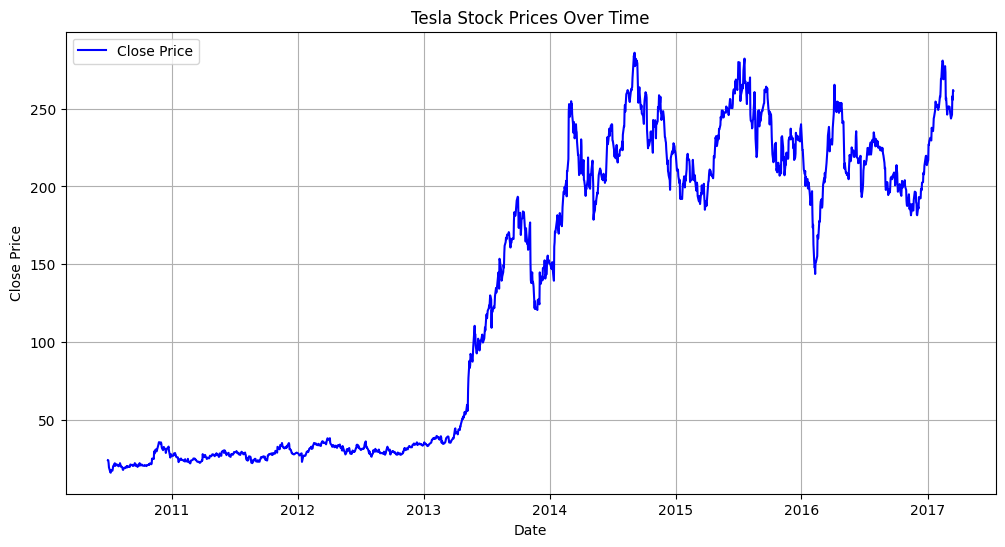

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Tesla Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

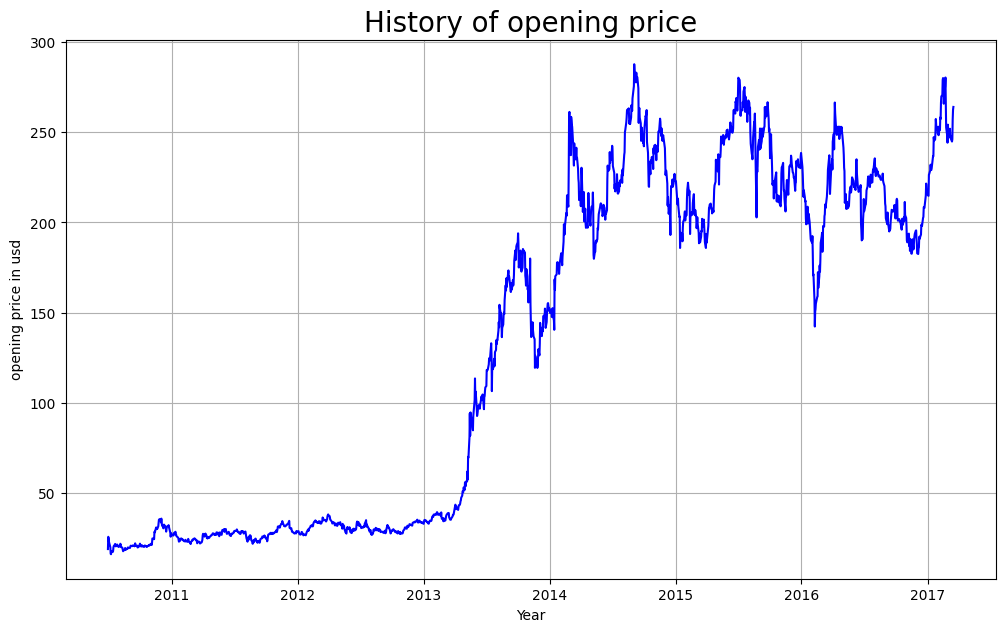

In [39]:
plt.figure(figsize=(12,7))
plt.title('History of opening price',fontsize=20)
plt.plot(data['Date'],data['Open'], color='blue')
plt.xlabel('Year', fontsize=10)
plt.ylabel('opening price in usd', fontsize = 10)
plt.grid(True)
plt.show()

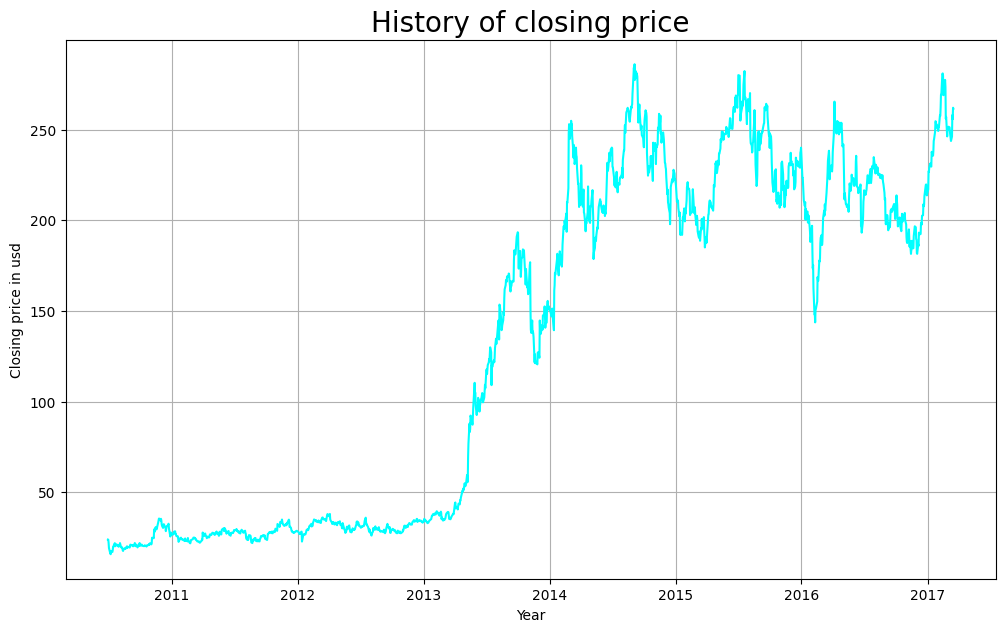

In [40]:
plt.figure(figsize=(12,7))
plt.title('History of closing price',fontsize=20)
plt.plot(data['Date'],data['Close'], color='cyan')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Closing price in usd', fontsize = 10)
plt.grid(True)
plt.show()

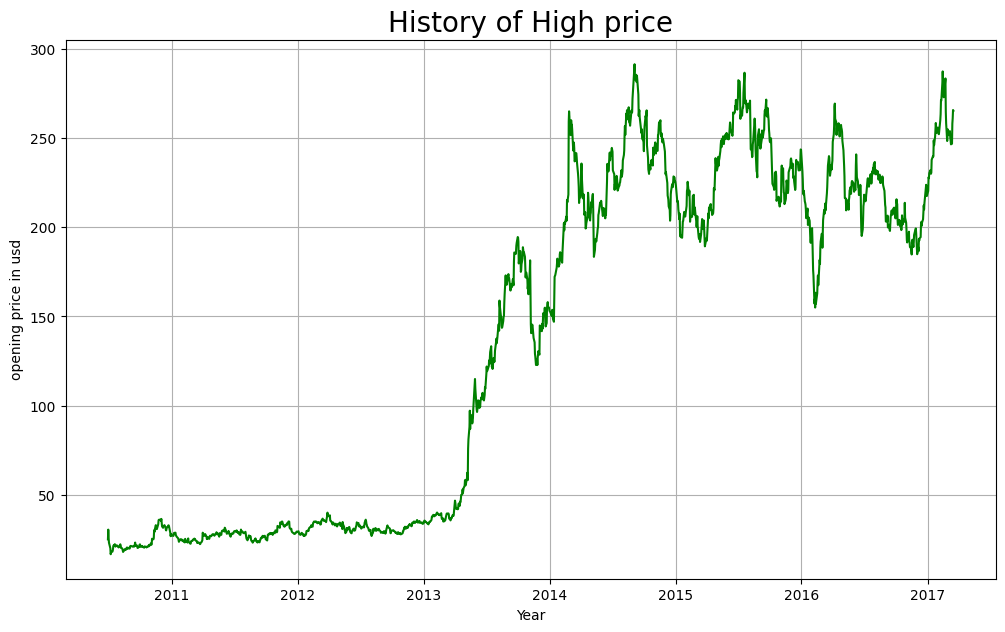

In [41]:
plt.figure(figsize=(12,7))
plt.title('History of High price',fontsize=20)
plt.plot(data['Date'],data['High'], color='green')
plt.xlabel('Year', fontsize=10)
plt.ylabel('opening price in usd', fontsize = 10)
plt.grid(True)
plt.show()

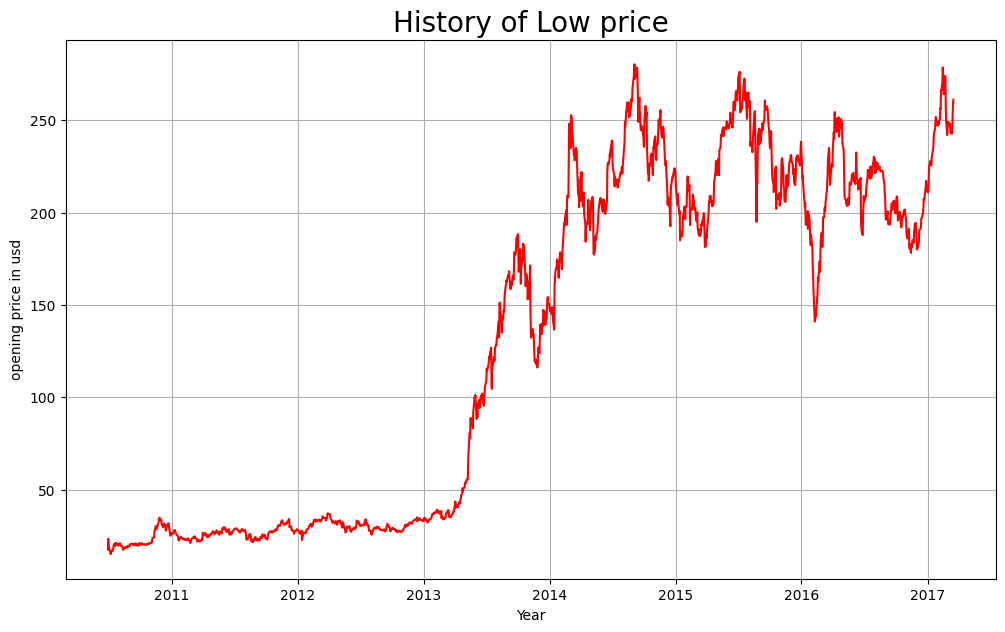

In [42]:
plt.figure(figsize=(12,7))
plt.title('History of Low price',fontsize=20)
plt.plot(data['Date'],data['Low'], color='red')
plt.xlabel('Year', fontsize=10)
plt.ylabel('opening price in usd', fontsize = 10)
plt.grid(True)
plt.show()

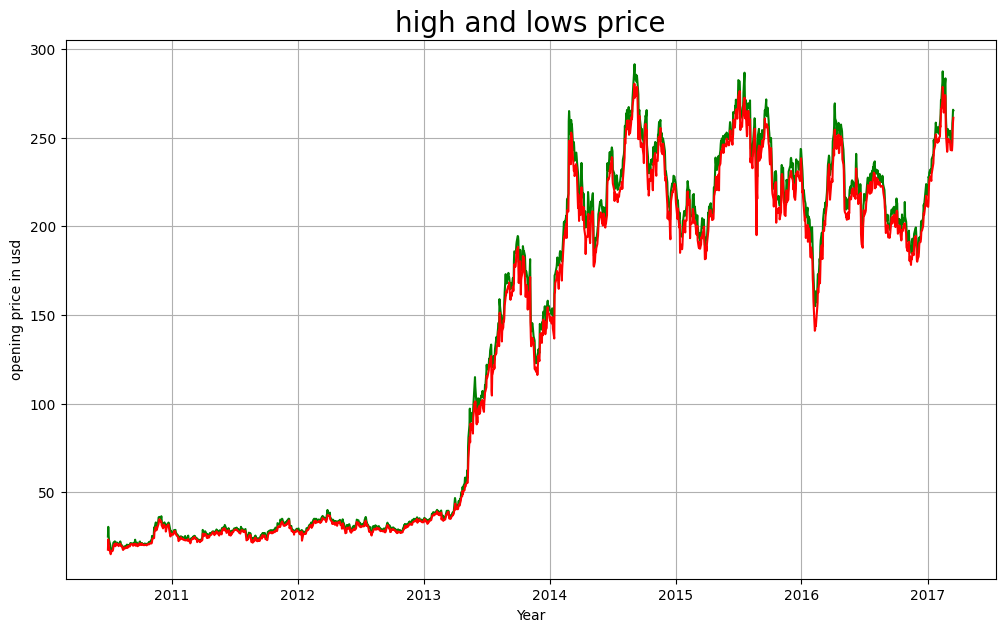

In [43]:
plt.figure(figsize=(12,7))
plt.title('high and lows price',fontsize=20)
plt.plot(data['Date'],data['High'], color='green')
plt.plot(data['Date'],data['Low'], color='red')
plt.xlabel('Year', fontsize=10)
plt.ylabel('opening price in usd', fontsize = 10)
plt.grid(True)
plt.show()

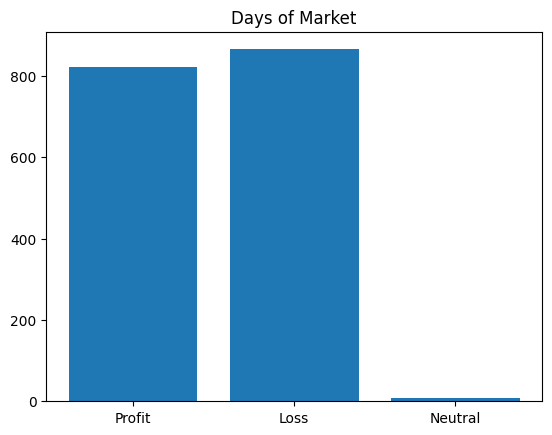

In [44]:
profit=data[data["Open"]<data['Close']].value_counts().sum()
loss=data[data["Open"]>data['Close']].value_counts().sum()
neutral=data[data["Open"]==data['Close']].count().value_counts().sum()

plt.title('Days of Market',fontsize='12')
x=np.array(['Profit','Loss','Neutral'])
y=np.array([profit,loss,neutral])
plt.bar(x,y)
plt.show()

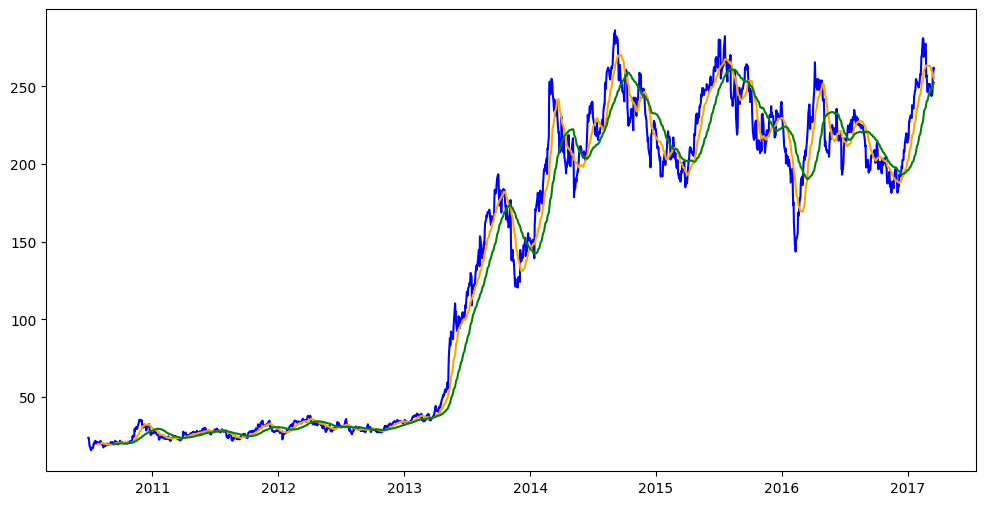

In [45]:
# Calculate moving averages to buy or sale stock
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

# Plot Close prices along with moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA20'], label='20-Day MA', color='orange')
plt.plot(data['Date'], data['MA50'], label='50-Day MA', color='green')

In [46]:

# Identify buy and sell signals
data['Signal'] = 0
data['Signal'] = data['MA20'] > data['MA50']

buy_signals = data[(data['Signal'] == True) & (data['Signal'].shift(1) == False)]
sell_signals = data[(data['Signal'] == False) & (data['Signal'].shift(1) == True)]

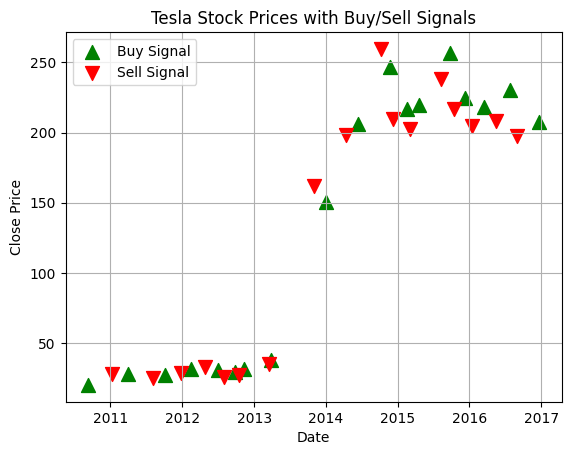

In [52]:

plt.scatter(buy_signals['Date'], buy_signals['Close'], label='Buy Signal', marker='^', color='green', s=100)
plt.scatter(sell_signals['Date'], sell_signals['Close'], label='Sell Signal', marker='v', color='red', s=100)

plt.title('Tesla Stock Prices with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()

In [53]:
# Add labels for Buy/Sell
data['Label'] = data['Signal'].astype(int)

# Normalize numerical features
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(
    data[['Open', 'High', 'Low', 'Close', 'Volume']]
)

# Droping rows with NaN values(preprocessing)
data.dropna(inplace=True)


print(data.head())

         Date      Open      High       Low     Close    Volume  Adj Close  \
49 2010-09-08  0.002875  0.002986  0.004216  0.005029  0.004586  20.900000   
50 2010-09-09  0.004145  0.003354  0.004561  0.004316  0.006956  20.709999   
51 2010-09-10  0.003212  0.002912  0.000997  0.002289  0.007237  20.170000   
52 2010-09-13  0.003734  0.002802  0.003833  0.004353  0.006541  20.719999   
53 2010-09-14  0.002427  0.005382  0.003948  0.005854  0.014474  21.120001   

       MA20     MA50  Signal  Label  
49  19.5220  19.8336   False      0  
50  19.6625  19.7700   False      0  
51  19.7910  19.6968    True      1  
52  19.9110  19.6720    True      1  
53  20.0280  19.7104    True      1  


In [54]:
# Features and labels
X = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = data['Label'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7386018237082067
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       140
           1       0.76      0.80      0.78       189

    accuracy                           0.74       329
   macro avg       0.73      0.73      0.73       329
weighted avg       0.74      0.74      0.74       329



C:\Users\tanvi\AppData\Local\Temp\ipykernel_10176\1461775022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predicted_Signal'] = y_pred


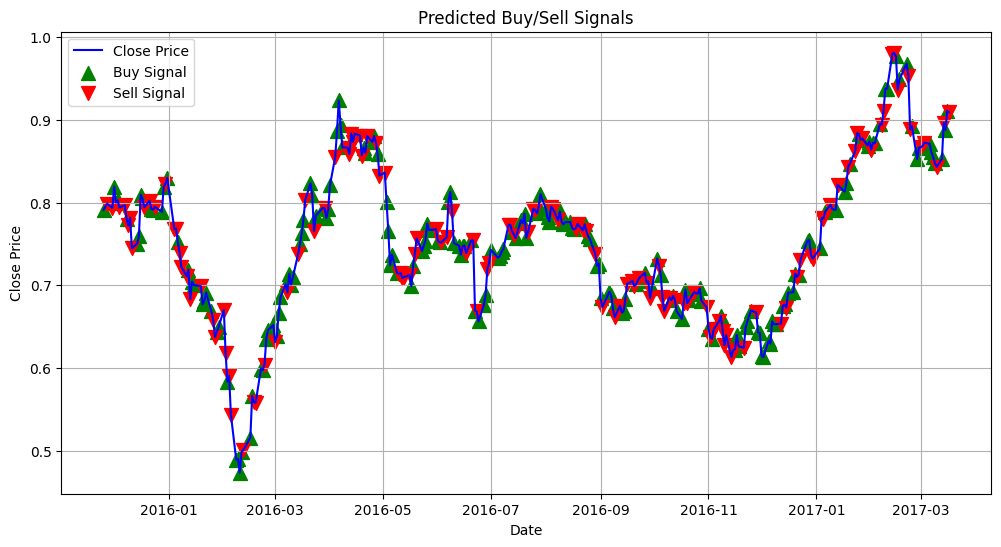

In [50]:
# Predict signals on the test set
data_test = data.iloc[-len(X_test):] 
data_test['Predicted_Signal'] = y_pred

# Visualize 
plt.figure(figsize=(12, 6))
plt.plot(data_test['Date'], data_test['Close'], label='Close Price', color='blue')
plt.scatter(data_test['Date'][data_test['Predicted_Signal'] == 1],
            data_test['Close'][data_test['Predicted_Signal'] == 1],
            label='Buy Signal', marker='^', color='green', s=100)
plt.scatter(data_test['Date'][data_test['Predicted_Signal'] == 0],
            data_test['Close'][data_test['Predicted_Signal'] == 0],
            label='Sell Signal', marker='v', color='red', s=100)

plt.title('Predicted Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.show()
